In [ ]:
from google.colab import drive

drive.mount("/content/drive")


Mounted at /content/drive


To run this notebook, first download the `train.csv` file from [here](https://www.kaggle.com/datasets/clkmuhammed/creditscoreclassification?select=train.csv). Then upload these files to your own Google Drive. After performing these steps, the below code creates a train-dev-test split in a reproducible manner.

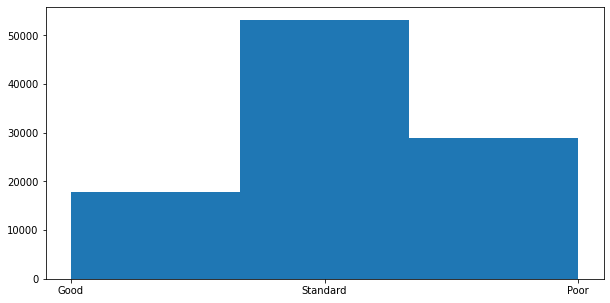

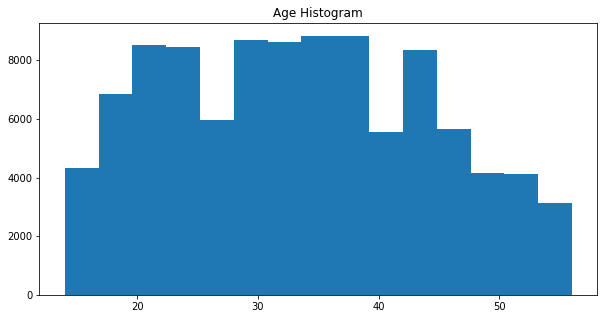

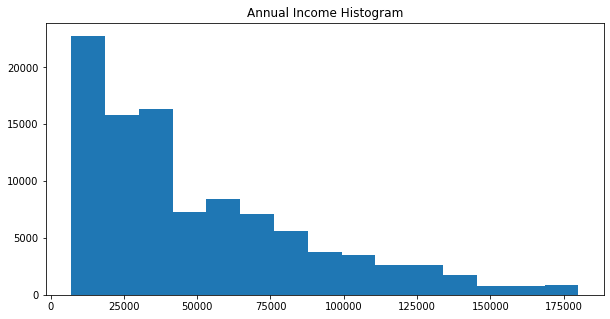

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/train.csv')
plt.rcParams['figure.figsize'] = [10, 5]
plt.hist(df['Credit_Score'], bins=3)
plt.show()
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Age Histogram')
plt.hist(df['Age'], bins=15)
plt.show()
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Annual Income Histogram')
plt.hist(df['Annual_Income'], bins=15)
plt.show()

train = df.sample(frac=0.7,random_state=0)
dev_test = df.drop(train.index)
dev = dev_test.sample(frac=1/3,random_state=0)
test = dev_test.drop(dev.index)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def getx(data):
  num_feats = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
               'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
               'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
               'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
               'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
  cat_feats = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
  num_X = np.stack((np.array(data[f]) for f in num_feats), 1)
  cat_X = []
  for f in cat_feats:
    term_to_idx = {term:i for i, term in enumerate(set(data[f]))}
    x = np.zeros((len(data), len(term_to_idx)))
    for i, term in enumerate(data[f]):
      x[i][term_to_idx[term]] = 1
    cat_X.append(x)
  return np.concatenate([num_X] + cat_X, 1)

def gety(data):
  score_dict = {'Poor':0, 'Standard':1, 'Good':2}
  Y = []
  for score in data['Credit_Score']:
    Y.append(score_dict[score])
  return np.array(Y)

scaler = MinMaxScaler()

train_X = getx(train)
dev_X = getx(dev)
test_X = getx(test)

scaler = MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)
dev_X = scaler.transform(dev_X)
test_X = scaler.transform(test_X)

train_Y = gety(train)
dev_Y = gety(dev)
test_Y = gety(test)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
def evaluate(name, train_pred, train_gt, pred, gt):
  print(name)
  print('Train Accuracy:', accuracy_score(train_gt, train_pred))
  print('Test Accuracy:', accuracy_score(gt, pred))
  print('Test F1:', f1_score(gt, pred, average='macro'))
  print('Classification Report:\n', classification_report(gt, pred))
  print('Confusion Matrix:\n', confusion_matrix(gt, pred))
  print()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0).fit(train_X, train_Y)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1,
                                 max_depth=30, random_state=0).fit(train_X, train_Y)

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=1000, random_state=0).fit(train_X, train_Y)

In [ ]:
from sklearn.svm import SVC

svm = SVC(C=10, kernel='rbf').fit(train_X, train_Y)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100), activation="relu", solver="adam", max_iter=1000).fit(train_X, train_Y)

In [ ]:
models = [('Random Forest', rf), ('XGBoost', xgb), ('Logistic Regression', log), ('SVM', svm), ('MLP', mlp)]

for name, model in models:
  evaluate(name, model.predict(train_X), train_Y, model.predict(test_X), test_Y)

Random Forest
Train Accuracy: 0.9991714285714286
Test Accuracy: 0.6373
Test F1: 0.6597060899881365
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.91      0.64      5830
           1       0.82      0.45      0.58     10611
           2       0.77      0.74      0.75      3559

    accuracy                           0.64     20000
   macro avg       0.69      0.70      0.66     20000
weighted avg       0.72      0.64      0.63     20000

Confusion Matrix:
 [[5297  453   80]
 [5079 4801  731]
 [ 338  573 2648]]

XGBoost
Train Accuracy: 1.0
Test Accuracy: 0.537
Test F1: 0.5703320384798806
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.91      0.57      5830
           1       0.73      0.27      0.39     10611
           2       0.77      0.73      0.75      3559

    accuracy                           0.54     20000
   macro avg       0.64      0.64      0.57     